<a href="https://colab.research.google.com/github/oparamo81/lab-notebook-originals/blob/main/Copy_of_Lab16_PiEstimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Virtual Darts
You go on vacation to Sea Ranch and are about to start working on the beach when you realize, “Wait, this is Sea Ranch…**NO CELL PHONE RECEPTION AND NO INTERNET!?**” You need the value of $\pi$, but you don’t remember where it is, you can’t search the web, and you left your books at home. But wait! You can estimate the answers you need, with the help of, of all things, (virtual) darts. Knowing that the area of the unit circle is $\pi$, and the area of the square that contains it is 4, you can throw a bunch of darts in the square and see what percentage of them end up in the circle. The ratio of darts that are in the circle and the total number of darts in the square is…$\pi / 4$!

## The `pi_estimate` function
You can estimate $\pi$ using virtual darts by implementing `pi_estimate`, below, as follows:
* The `pi_estimate` function takes a single argument, `number_of_darts`. For that number of darts, the function should use `rng.uniform` to pick `x` and `y` coordinates between -1.0 and 1.0 (note that this will produce “darts” that fall within the 2x2 square centered at the origin)
* Maintain a list of darts within the function—this starts out empty of course
* For each dart, check whether the dart landed within the unit circle using the Pythogorean theorem: $x^2 + y^2 \leq r^2$. Note: What is the radius $r$ if we’re using a unit circle?
  * Keep track of the number of darts that ended up in the circle as well as the total number of darts “thrown” (note this latter number is the number of darts that ended up in the 2x2 square)
  * If a dart was within the unit circle, store it in the overall list of darts as the tuple `(x, y, 'in')`
  * If a dart was not within the unit circle, store it in the overall list of darts as the tuple `(x, y, 'out')`
* Use the proportion (darts in circle / total darts) = $\pi / 4$ to estimate the value of $\pi$
* Have `pi_estimate` return the tuple `(estimate, darts)` when it is finished


In [4]:
from numpy.random import default_rng
rng = default_rng() # Random number generator courtesy of numpy.

def pi_estimate(number_of_darts):
    """
    Estimates the value of π by throwing darts. This function will "throw"
    the given number of darts at random coordinates within the 2x2 square
    centered around the origin. If the chosen point is inside the unit circle,
    it will consider it to be 'in'; otherwise it is 'out'. It keeps track of
    how many are 'in' and how many are 'out'.

    The function then records these coordinates and status as a tuple in
    an overall list. For example: [(0, 0, 'in'), (0.5, 0.9, 'out')]

    The return value of the function is a tuple consisting of its π estimate
    and the overall list of dart-tuples.
    """
    if number_of_darts < 1:
        print('At least one dart is needed for estimate')
        return None
    
    # Randomly pick darts and count how many land inside the circle.
    number_of_hits = 0 # The number of darts that land inside the circle.
    radius = 1.0 # For convenience, we keep the radius in a variable.
    darts = [] # The total list of darts generated.

    # "Throw" the given number_of_darts, picking coordinates using
    # rng.uniform(-1, 1)
    #
    # TODO
    for i in range(number_of_darts):
        x = rng.uniform(-1,1)
        y = rng.uniform(-1,1)
        darts.append((x,y,'out'))
        # Pythagorean theorem checks if point is inside the circle.
        # TODO
            # Append (x, y, 'in') if the dart is in the circle.
            # TODO
            # Keep track of how many darts ended up inside the circle.
            # TODO
            # Append (x, y, 'out') if the dart is not in the circle.
            # TODO

    estimate = None # TODO
    return estimate, darts

## Test and Visualize

While you’re working on `pi_estimate`, you can use the code below to run it, see your estimated value (“π-ish”), and visualize the random darts that you threw! Darts that `pi_estimate` marks as `'in'` will appear red, while darts that are marked as `'out'` will appear blue.

Recommended sequence: first, generate a throwaway estimate and hardcoded list of darts, just to see if the visualization works. Next, start generating random darts but label them all `'in'` or `'out'`. Finally, add the Pythagorean theorem logic that will show whether the dart was within the circle. When you get here, you can also implement the correct estimate calculation.

How many darts? 100
π estimate: None


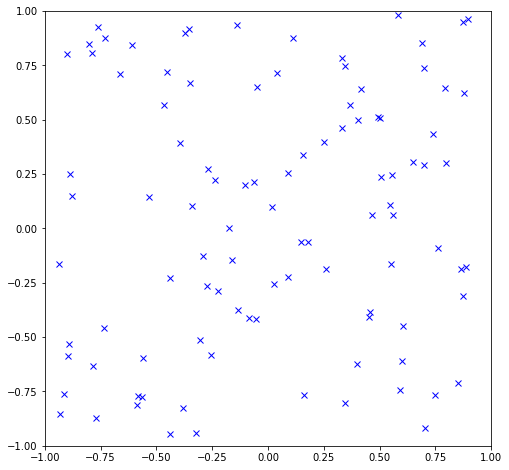

In [16]:
import matplotlib.pyplot as plt

number_of_darts = int(input('How many darts? '))
pi_ish, darts = pi_estimate(number_of_darts)

in_points = list(filter(lambda p: p[2] == 'in', darts))
out_points = list(filter(lambda p: p[2] == 'out', darts))
x_in = [p[0] for p in in_points]
y_in = [p[1] for p in in_points]
x_out = [p[0] for p in out_points]
y_out = [p[1] for p in out_points]

plt.figure(figsize=(8, 8))
plt.xlim((-1.0, 1.0))
plt.ylim((-1.0, 1.0))
plt.plot(x_in, y_in, 'rx', x_out, y_out, 'bx')

print('π estimate:', pi_ish )